# ROMY - Barometer

In [1]:
import os
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np

from src.baroarray import baroArray

In [2]:
# Configuration
config = {

    # time parameters
    # 'tbeg': "2025-01-01 00:00:00",
    # 'tend': "2025-01-02 00:00:00",
    'time_buffer': 3*3600,

    # set data source
    'data_source': 'sds',
    'sds_path': '/home/andbro/freenas/temp_archive/',

    'inventory_path': './metadata/',

    # set verbosity
    'verbose': True,

    # merge nans
    'merge_nans': True,

    # Initialize with station seeds
    'seeds': [
        "BW.PROMY.01.LDI",
        "BW.TON..LDO",
        "BW.BIB..LDO",
        "BW.GRMB..LDO",
        "BW.ALFT..LDO",
        "BW.GELB..LDO",
    ],

    # set reference station
    'reference_station': "BW.PROMY.01.LDI",

    # set sampling rate
    'sampling_rate': 1.0,
}


In [8]:
# Create baroArray object
ba = baroArray(config=config)

# Load data
# ba.load_data(tbeg="2025-02-18 00:00",
#              tend="2025-02-20 00:00",
# )

# Load data
# ba.load_data(
#     tbeg="2025-02-01 00:00",
#     tend="2025-02-03 00:00",
# )

# Load data
# ba.load_data(
#     tbeg="2024-03-15 00:00",
#     tend="2024-03-16 00:00",
# )

# Load data
# ba.load_data(
#     tbeg="2024-03-24 00:00",
#     tend="2024-03-25 00:00",
# )

# Load data
# ba.load_data(
#     tbeg="2024-04-23 00:00",
#     tend="2024-04-24 00:00",
# )

# Load data
ba.load_data(
    tbeg="2024-03-12 00:00",
    tend="2024-03-14 00:00",
)

Loaded BW.GRMB..LDO from SDS archive
Loaded BW.BIB..LDO from SDS archive
Loaded BW.TON..LDO from SDS archive
Loaded BW.PROMY.01.LDI from SDS archive
Loaded BW.GELB..LDO from SDS archive
Loaded BW.ALFT..LDO from SDS archive


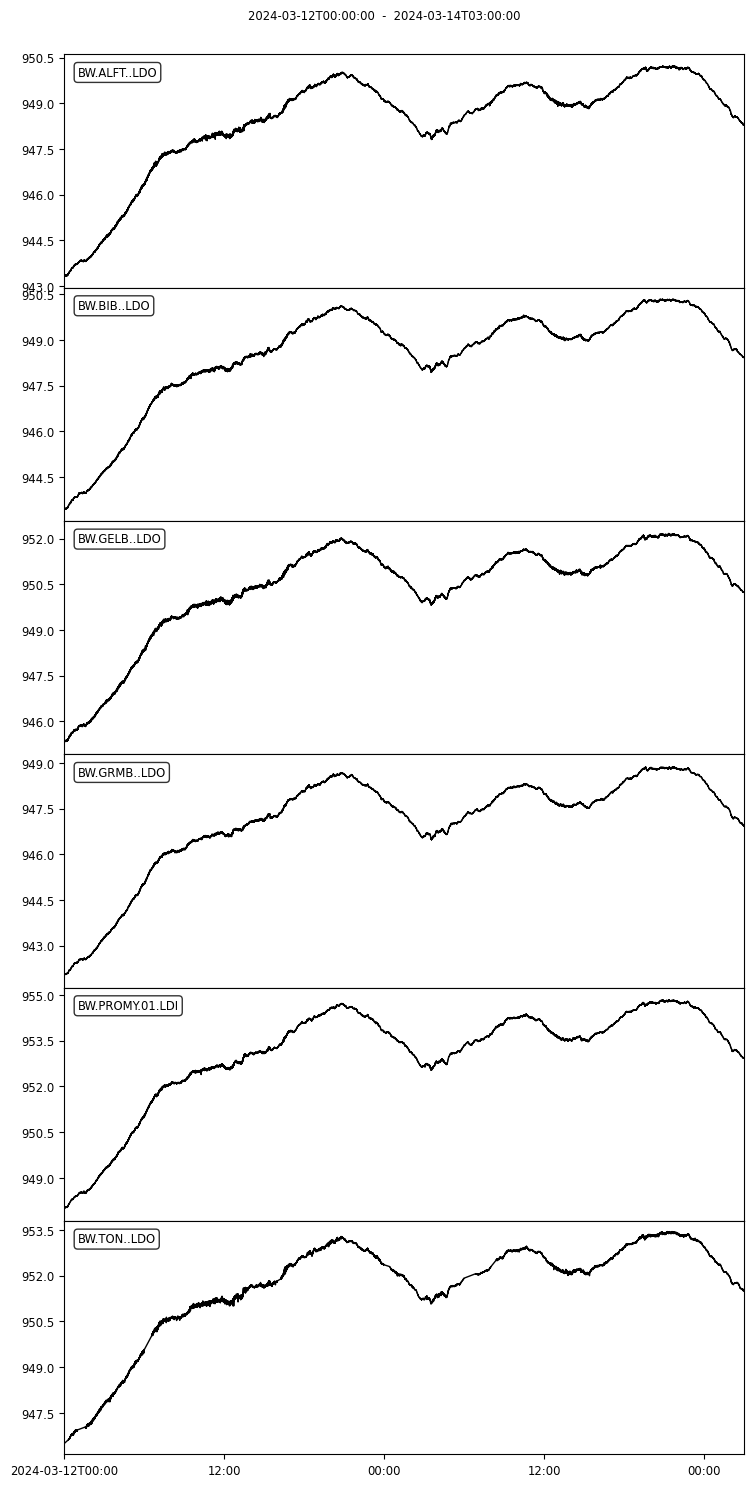

In [9]:
ba.st.plot();

In [10]:
results = ba.compute_station_distances()


Station distances:
BW.TON: 1.57 km
BW.BIB: 2.41 km
BW.GRMB: 2.64 km
BW.ALFT: 2.31 km
BW.GELB: 1.79 km


/home/andbro/.local/lib/python3.10/site-packages/obspy/core/inventory/network.py:321: UserWarning: Found more than one matching channel metadata. Returning first.
  warnings.warn(msg)


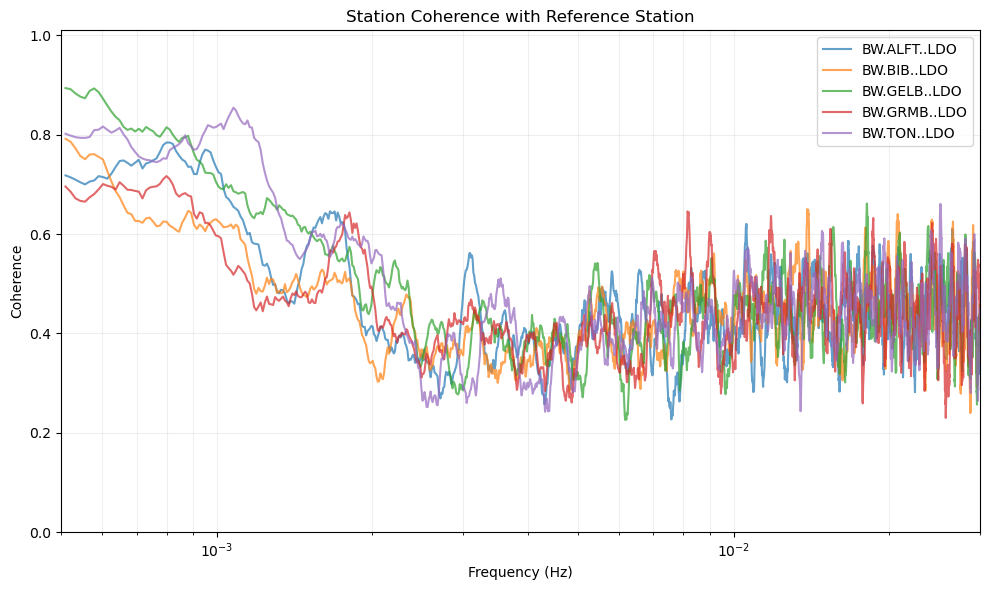

In [11]:
try:
    # compute coherence
    coherence = ba.compute_coherence(
        window_sec=24*3600,  # 2 hour windows
        overlap=0.5,      # 50% overlap
        smooth_points=50  # Smoothing window
    )

    # plot results
    ba.plot_coherence(
        coherence,
        fmin=0.0005,
        fmax=0.03
    )
except:
    pass


In [12]:
ba.filter_data(fmin=0.0001, fmax=0.001)

Detrending and tapering data...
Applying bandpass filter 0.0001 - 0.001 Hz...


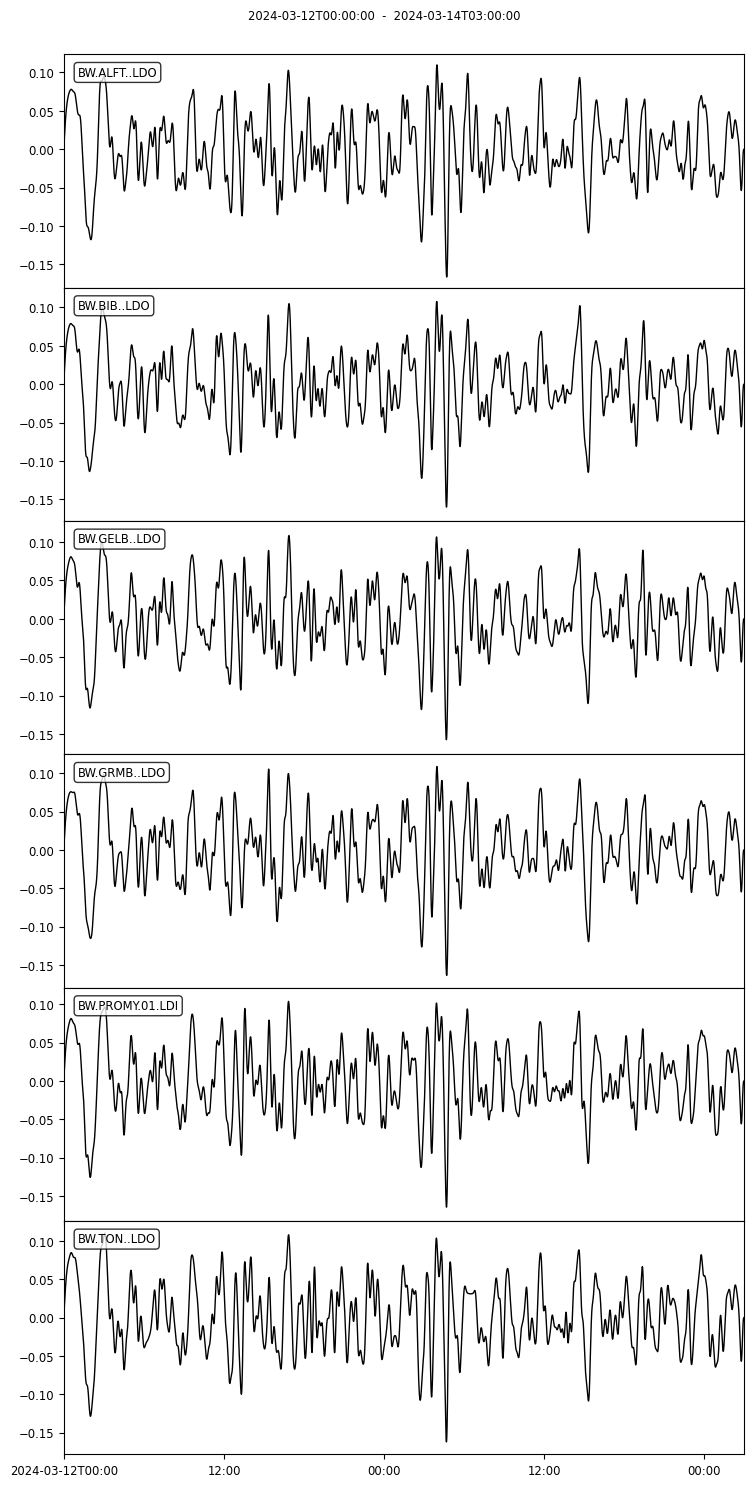

In [13]:
ba.st.plot();

In [19]:
ba.compute_baro_gradient(vp=5., vs=5.*np.sqrt(3), sigmau=1e-9, mode='tilt')

/home/andbro/.local/lib/python3.10/site-packages/obspy/core/inventory/network.py:321: UserWarning: Found more than one matching channel metadata. Returning first.
  warnings.warn(msg)
/home/andbro/.local/lib/python3.10/site-packages/obspy/signal/array_analysis.py:331: UserWarning: Condition number is 69895.75024310936
  warnings.warn(msg)



Computed pressure gradients:
2 Trace(s) in Stream:
BW.PROMY.01.LDN | 2024-03-12T00:00:00.000000Z - 2024-03-14T03:00:00.000000Z | 1.0 Hz, 183601 samples
BW.PROMY.01.LDE | 2024-03-12T00:00:00.000000Z - 2024-03-14T03:00:00.000000Z | 1.0 Hz, 183601 samples


2 Trace(s) in Stream:
BW.PROMY.01.LDN | 2024-03-12T00:00:00.000000Z - 2024-03-14T03:00:00.000000Z | 1.0 Hz, 183601 samples
BW.PROMY.01.LDE | 2024-03-12T00:00:00.000000Z - 2024-03-14T03:00:00.000000Z | 1.0 Hz, 183601 samples

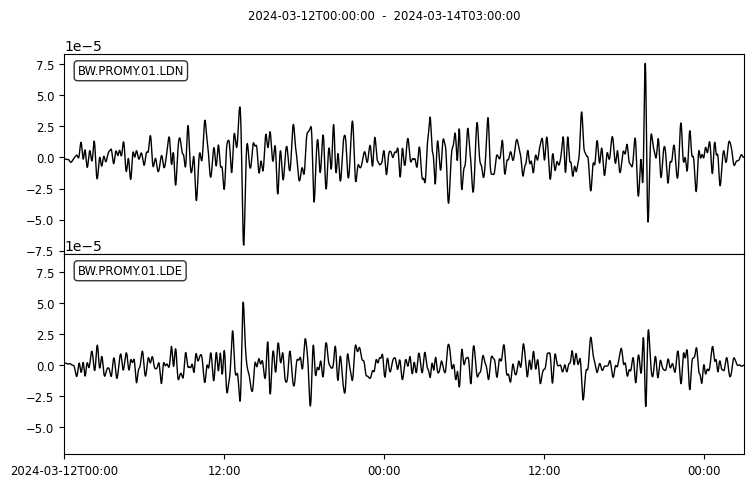

In [20]:
ba.st_grad.plot(equal_scale="False");


/home/andbro/cursorfiles/baroseis/src/baroarray.py:882: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


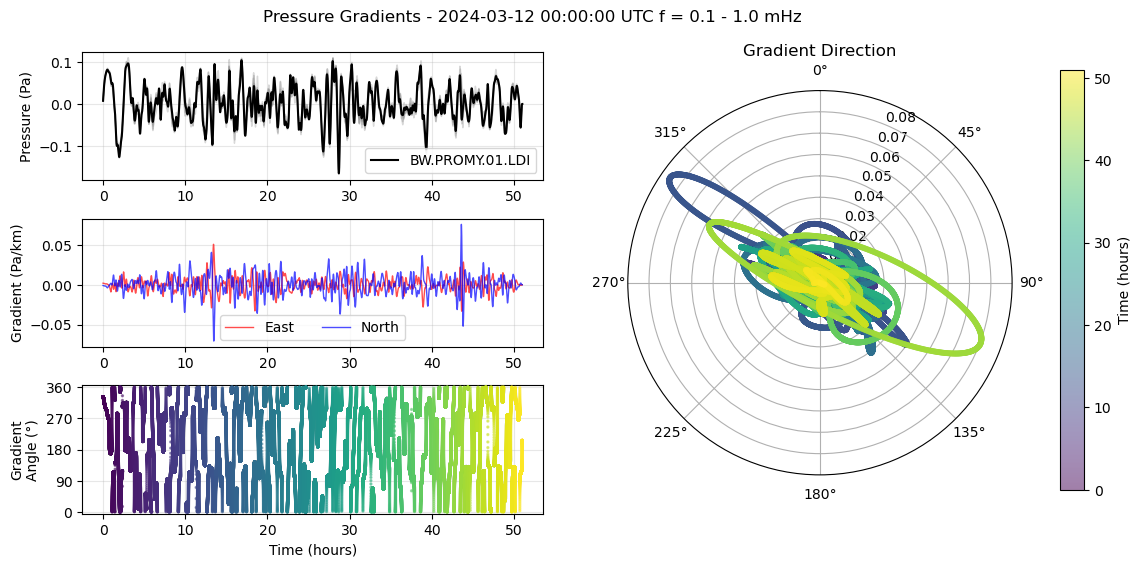

In [21]:
fig = ba.plot_gradient(figsize=(12, 6), out=True)

# fig.savefig("./figures/gradient_20240307.png", dpi=150, bbox_inches="tight")

In [22]:
from obspy import UTCDateTime
ba.st_grad.trim(UTCDateTime("2024-03-12 00:00"), UTCDateTime("2024-03-13 00:00"))
ba.st_grad.write("./data/pressure_gradient_20240312.mseed", format="MSEED")

In [23]:
ba.write_to_sds(ba.st_grad, "./data/")

Written: BW.PROMY.01.LDN.D.2024.072
Written: BW.PROMY.01.LDE.D.2024.072
